In [11]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers

In [12]:
tf.__version__

'2.13.0'

In [13]:
# 3.5 新聞分類：多分類問題
# §代碼清單 3-12

from keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words = 10000)

In [14]:
# === FOR CHECK ===
print('train records : ', len(train_data))
print('test  records : ', len(test_data))
print('\n')
print('train_data[10] :')
print(train_data[10])

train records :  8982
test  records :  2246


train_data[10] :
[1, 245, 273, 207, 156, 53, 74, 160, 26, 14, 46, 296, 26, 39, 74, 2979, 3554, 14, 46, 4689, 4329, 86, 61, 3499, 4795, 14, 61, 451, 4329, 17, 12]


In [15]:
# §代碼清單 3-13

word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[10]])

print(decoded_newswire)

? period ended december 31 shr profit 11 cts vs loss 24 cts net profit 224 271 vs loss 511 349 revs 7 258 688 vs 7 200 349 reuter 3


In [16]:
print(train_labels[10])

3


In [18]:
# §代碼清單 3-14

import numpy as np

def vectorize_sequences(sequences, dimension = 10000) :
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences) :
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [19]:
# §代碼清單 3-14 數據編碼 continue ...

def to_one_hot(labels, dimension = 46) :
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels) :
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

# built-in metho in keras
#from keras.utils.np_utils import to_categorical
#one_hot_train_labels = to_categorical(train_labels)
#one_hot_test_labels = to_categorical(test_labels)


In [20]:
# §代碼清單 3-15 模型定義

from keras import models
from keras import layers

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))


In [21]:
# §代碼清單 3-16 編譯模型

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])


In [22]:
# §代碼清單 3-17 留出驗證集

x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]


In [23]:
# §代碼清單 3-18 訓練模型

history = model.fit(partial_x_train,
                   partial_y_train,
                   epochs = 20,
                   batch_size = 512,
                   validation_data = (x_val, y_val))


Epoch 1/20
16/16 [==============================] - 2s 48ms/step - loss: 2.8978 - accuracy: 0.4534 - val_loss: 2.0227 - val_accuracy: 0.6330
Epoch 2/20
16/16 [==============================] - 0s 26ms/step - loss: 1.6248 - accuracy: 0.6827 - val_loss: 1.3924 - val_accuracy: 0.7060
Epoch 3/20
16/16 [==============================] - 0s 25ms/step - loss: 1.1808 - accuracy: 0.7468 - val_loss: 1.1761 - val_accuracy: 0.7520
Epoch 4/20
16/16 [==============================] - 0s 29ms/step - loss: 0.9531 - accuracy: 0.7969 - val_loss: 1.0632 - val_accuracy: 0.7680
Epoch 5/20
16/16 [==============================] - 0s 27ms/step - loss: 0.7878 - accuracy: 0.8329 - val_loss: 0.9887 - val_accuracy: 0.7900
Epoch 6/20
16/16 [==============================] - 0s 28ms/step - loss: 0.6643 - accuracy: 0.8582 - val_loss: 0.9385 - val_accuracy: 0.7950
Epoch 7/20
16/16 [==============================] - 0s 26ms/step - loss: 0.5579 - accuracy: 0.8802 - val_loss: 0.9082 - val_accuracy: 0.8070
Epoch 8/20
16

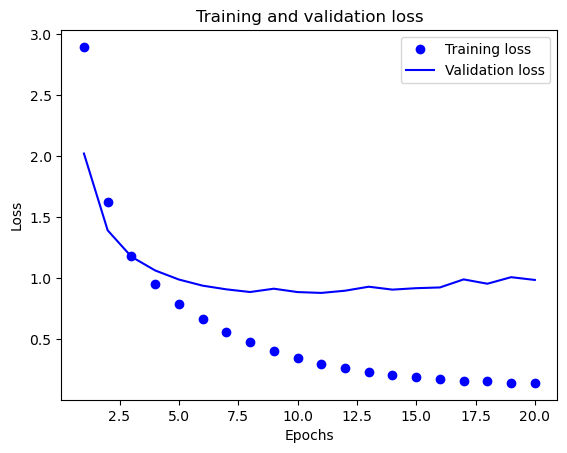

In [24]:
# §代碼清單 3-19 繪製訓練損失和驗證損失

import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


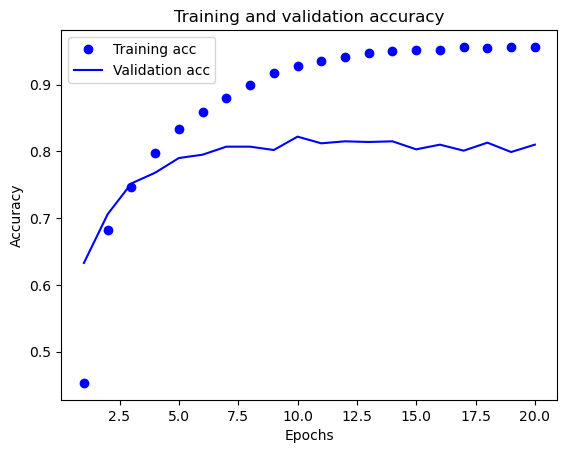

In [25]:
# §代碼清單 3-20 繪製訓練精度和驗證精度

plt.clf()
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, 'bo', label = 'Training acc')
plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()


In [28]:
# §代碼清單 3-21 從頭開始重新訓練一個模型

model = models.Sequential()

model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(64, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 9,
         batch_size = 512,
         validation_data = (x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)


Epoch 1/9
16/16 [==============================] - 2s 71ms/step - loss: 2.8340 - accuracy: 0.4966 - val_loss: 1.8943 - val_accuracy: 0.6080
Epoch 2/9
16/16 [==============================] - 0s 28ms/step - loss: 1.5973 - accuracy: 0.6695 - val_loss: 1.4107 - val_accuracy: 0.6730
Epoch 3/9
16/16 [==============================] - 0s 26ms/step - loss: 1.2183 - accuracy: 0.7402 - val_loss: 1.2155 - val_accuracy: 0.7240
Epoch 4/9
16/16 [==============================] - 0s 26ms/step - loss: 0.9897 - accuracy: 0.7898 - val_loss: 1.0794 - val_accuracy: 0.7740
Epoch 5/9
16/16 [==============================] - 0s 26ms/step - loss: 0.8172 - accuracy: 0.8252 - val_loss: 1.0122 - val_accuracy: 0.7800
Epoch 6/9
16/16 [==============================] - 0s 26ms/step - loss: 0.6801 - accuracy: 0.8572 - val_loss: 0.9384 - val_accuracy: 0.8070
Epoch 7/9
16/16 [==============================] - 0s 26ms/step - loss: 0.5765 - accuracy: 0.8789 - val_loss: 0.9123 - val_accuracy: 0.8130
Epoch 8/9
16/16 [===

In [29]:
# === FOR CHECK (p.64, pdf.81) ===
print(results)

[0.9528838992118835, 0.7880676984786987]


In [32]:
# §代碼清單 3-22 在新數據上生成預測結果

predictions = model.predict(x_test)

#print(predictions[0].shape)
#print(np.argmax(predictions[0]))

#y_train = np.array(train_labels)
#y_test = np.array(test_labels)

#model.compile(optimizer = 'rmsprop',
#             loss = 'sparse_categorical_crossentropy',
#             metric = ['accuracy'])



71/71 [==============================] - 0s 3ms/step


In [34]:
# §代碼清單 3-23 具有信息瓶頸的模型

model = models.Sequential()
model.add(layers.Dense(64, activation = 'relu', input_shape = (10000,)))
model.add(layers.Dense(4, activation = 'relu'))
model.add(layers.Dense(46, activation = 'softmax'))

model.compile(optimizer = 'rmsprop',
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])
model.fit(partial_x_train,
         partial_y_train,
         epochs = 20,
         batch_size = 128,
         validation_data = (x_val, y_val))


Epoch 1/20
63/63 [==============================] - 2s 20ms/step - loss: 2.9875 - accuracy: 0.4328 - val_loss: 2.1429 - val_accuracy: 0.5470
Epoch 2/20
63/63 [==============================] - 1s 17ms/step - loss: 1.7870 - accuracy: 0.5514 - val_loss: 1.6123 - val_accuracy: 0.5620
Epoch 3/20
63/63 [==============================] - 1s 15ms/step - loss: 1.4463 - accuracy: 0.5960 - val_loss: 1.4500 - val_accuracy: 0.6140
Epoch 4/20
63/63 [==============================] - 1s 15ms/step - loss: 1.2520 - accuracy: 0.6689 - val_loss: 1.3666 - val_accuracy: 0.6620
Epoch 5/20
63/63 [==============================] - 1s 15ms/step - loss: 1.1091 - accuracy: 0.7239 - val_loss: 1.3118 - val_accuracy: 0.6850
Epoch 6/20
63/63 [==============================] - 1s 15ms/step - loss: 1.0036 - accuracy: 0.7402 - val_loss: 1.2985 - val_accuracy: 0.6860
Epoch 7/20
63/63 [==============================] - 1s 14ms/step - loss: 0.9228 - accuracy: 0.7527 - val_loss: 1.2905 - val_accuracy: 0.6840
Epoch 8/20
63

In [35]:
# === FOR CHECK (p.64, pdf.81) ===

results = model.evaluate(x_test, one_hot_test_labels)
print(results)


71/71 [==============================] - 0s 5ms/step - loss: 1.6811 - accuracy: 0.6941
[1.681141972541809, 0.6941229104995728]
